Loading Severe DR images: 100%|██████████| 190/190 [00:00<00:00, 244.48it/s]


Epoch 1/100


I0000 00:00:1724856587.335626     187 service.cc:145] XLA service 0x7bf094007f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724856587.335674     187 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1724857301.802622     187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_19', 24 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_24', 20 bytes spill stores, 20 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_25', 24 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_26', 8 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_

137/138 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.6097 - loss: 3.6722

2024-08-28 15:14:04.823847: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_one_step_on_data_290289__.206279] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
I0000 00:00:1724858098.074988     187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_76', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1765', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_79', 356 bytes spill stores, 356 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_82', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory 

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6101 - loss: 3.6702   

I0000 00:00:1724858131.041037     187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1724858158.454358     189 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_37', 8 bytes spill stores, 8 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 1792s 6s/step - accuracy: 0.6105 - loss: 3.6682 - val_accuracy: 0.6709 - val_loss: 3.1331 - learning_rate: 1.0000e-04
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 590ms/step - accuracy: 0.7598 - loss: 2.7542 - val_accuracy: 0.7055 - val_loss: 2.6715 - learning_rate: 1.0000e-04
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 587ms/step - accuracy: 0.8138 - loss: 2.2551 - val_accuracy: 0.7436 - val_loss: 2.4181 - learning_rate: 1.0000e-04
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 590ms/step - accuracy: 0.8736 - loss: 1.9726 - val_accuracy: 0.7200 - val_loss: 2.4043 - learning_rate: 1.0000e-04
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 583ms/step - accuracy: 0.8935 - loss: 1.7650 - val_accuracy: 0.7382 - val_loss: 2.3070 - learning_rate: 1.0000e-04
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 604ms/step - accuracy: 0.9102 - loss: 1.5839 - val_accuracy: 0.7600 - val_loss: 2.1807 - learning_rate: 1.0000e-04
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 585ms/st

I0000 00:00:1724864486.110288     187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 218ms/step - accuracy: 0.7838 - loss: 1.0820
Validation Accuracy: 0.79


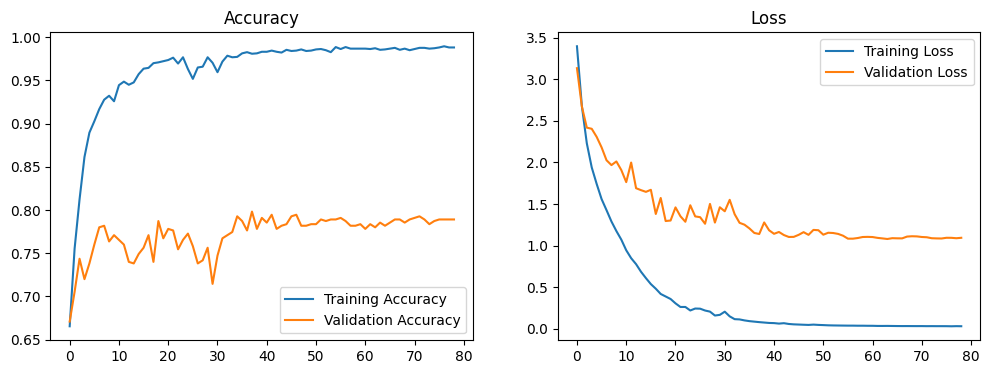

Model saved to /kaggle/working/diabetic_retinopathy_ensemble_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step
DR Level Percentages: {'Healthy': 0.0007459771, 'Mild DR': 0.0022753829, 'Moderate DR': 99.99439, 'Proliferate DR': 0.0016028924, 'Severe DR': 0.0009856814}


In [2]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB7, DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


# Set parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16  # Smaller batch size for better generalization
EPOCHS = 100

# 1. Load the Dataset
dataset_path = '/kaggle/input/diabetic-retinopathy-dataset'  
images = []
labels = []

for class_label in ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']:
    class_path = os.path.join(dataset_path, class_label)
    class_images = os.listdir(class_path)
    
    for img_name in tqdm(class_images, desc=f"Loading {class_label} images"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_label)
        else:
            print(f"Warning: Failed to read {img_path}")

images = np.array(images)
labels = np.array(labels)

# 2. Encode the Labels
label_map = {'Healthy': 0, 'Mild DR': 1, 'Moderate DR': 2, 'Proliferate DR': 3, 'Severe DR': 4}
labels = np.array([label_map[label] for label in labels])
labels = to_categorical(labels, num_classes=5)

# 3. Split Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# 4. Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

datagen.fit(X_train)

# 5. Load EfficientNetB7 and DenseNet201, and add custom layers
efficientnet_base = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
densenet_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))

# Unfreeze more layers for fine-tuning in EfficientNet
for layer in efficientnet_base.layers[-40:]:
    layer.trainable = True

# Unfreeze more layers for fine-tuning in DenseNet
for layer in densenet_base.layers[-40:]:
    layer.trainable = True

# EfficientNetB7 custom layers
efficientnet_x = GlobalAveragePooling2D()(efficientnet_base.output)
efficientnet_x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(efficientnet_x)
efficientnet_x = Dropout(0.5)(efficientnet_x)
efficientnet_output = Dense(5, activation='softmax')(efficientnet_x)

# DenseNet201 custom layers
densenet_x = GlobalAveragePooling2D()(densenet_base.output)
densenet_x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(densenet_x)
densenet_x = Dropout(0.5)(densenet_x)
densenet_output = Dense(5, activation='softmax')(densenet_x)

# Ensemble the models by averaging their predictions
from tensorflow.keras.layers import Average

ensemble_output = Average()([efficientnet_output, densenet_output])

model = Model(inputs=[efficientnet_base.input, densenet_base.input], outputs=ensemble_output)

# 6. Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Set Callbacks for Learning Rate Adjustment and Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

# 8. Train the Model
history = model.fit(
    [X_train, X_train], y_train,  # Pass the same data to both inputs
    validation_data=([X_val, X_val], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, early_stopping]
)

# 9. Evaluate the Model
loss, accuracy = model.evaluate([X_val, X_val], y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# 10. Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# 11. Save the Model
model_save_path = '/kaggle/working/diabetic_retinopathy_ensemble_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

# 12. Predict and Show DR Levels in Percentage
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict([img, img])  # Pass the same image to both inputs
    percentages = predictions[0] * 100  # Convert to percentages
    dr_levels = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    return dict(zip(dr_levels, percentages))

# Example usage:
image_path = '/kaggle/input/diabetic-retinopathy-dataset/Moderate DR/Moderate_DR_10.png'  
result = predict_image(image_path)
print("DR Level Percentages:", result)


Loading Severe DR images: 100%|██████████| 190/190 [00:01<00:00, 110.24it/s]


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/100


I0000 00:00:1724981847.006639      82 service.cc:145] XLA service 0x7b1430003430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724981847.006687      82 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-08-30 01:49:23.730940: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_one_step_on_data_290313__.206288] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
I0000 00:00:1724982566.445312      82 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_19', 24 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_24', 20 bytes spill stores, 20 bytes spill loads
ptxas warning : Reg

137/138 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.5731 - loss: 4.3618

I0000 00:00:1724983361.276738      82 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_76', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1766', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_79', 356 bytes spill stores, 356 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_82', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_86', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1761', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_89', 36 bytes spill stores, 36 b

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5737 - loss: 4.3590   

I0000 00:00:1724983394.618199      82 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1724983421.886921      83 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_37', 8 bytes spill stores, 8 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 1802s 6s/step - accuracy: 0.5743 - loss: 4.3562 - val_accuracy: 0.6855 - val_loss: 3.1318 - learning_rate: 1.0000e-04
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 585ms/step - accuracy: 0.7633 - loss: 3.1945 - val_accuracy: 0.6891 - val_loss: 2.8084 - learning_rate: 1.0000e-04
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 585ms/step - accuracy: 0.8224 - loss: 2.6995 - val_accuracy: 0.7418 - val_loss: 2.6277 - learning_rate: 1.0000e-04
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 595ms/step - accuracy: 0.8773 - loss: 2.3283 - val_accuracy: 0.7782 - val_loss: 2.4535 - learning_rate: 1.0000e-04
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 595ms/step - accuracy: 0.8965 - loss: 2.1784 - val_accuracy: 0.7473 - val_loss: 2.3429 - learning_rate: 1.0000e-04
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 84s 609ms/step - accuracy: 0.9211 - loss: 1.9769 - val_accuracy: 0.7418 - val_loss: 2.3904 - learning_rate: 1.0000e-04
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 82s 598ms/st

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 583ms/step - accuracy: 0.9878 - loss: 0.1047 - val_accuracy: 0.7855 - val_loss: 1.1481 - learning_rate: 6.2500e-06
Epoch 78/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 598ms/step - accuracy: 0.9865 - loss: 0.1079 - val_accuracy: 0.7927 - val_loss: 1.1396 - learning_rate: 6.2500e-06
Epoch 79/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 581ms/step - accuracy: 0.9919 - loss: 0.1007 - val_accuracy: 0.7909 - val_loss: 1.1329 - learning_rate: 6.2500e-06
Epoch 80/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 579ms/step - accuracy: 0.9893 - loss: 0.0996 - val_accuracy: 0.7964 - val_loss: 1.1342 - learning_rate: 6.2500e-06
Epoch 81/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 583ms/step - accuracy: 0.9868 - loss: 0.0989 - val_accuracy: 0.7909 - val_loss: 1.1315 - learning_rate: 6.2500e-06
Epoch 82/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 80s 579ms/step - accuracy: 0.9848 - loss: 0.0985 - val_accuracy: 0.7891 - val_loss: 1.1398 - learning_rate: 6.2500e-06
Epoch 83/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 5

I0000 00:00:1724991541.054561      80 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 215ms/step - accuracy: 0.7804 - loss: 1.1126
Validation Accuracy: 0.79


I0000 00:00:1724991574.040817      83 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 8 bytes spill stores, 8 bytes spill loads



17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step

I0000 00:00:1724991606.382446      83 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_33', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step 


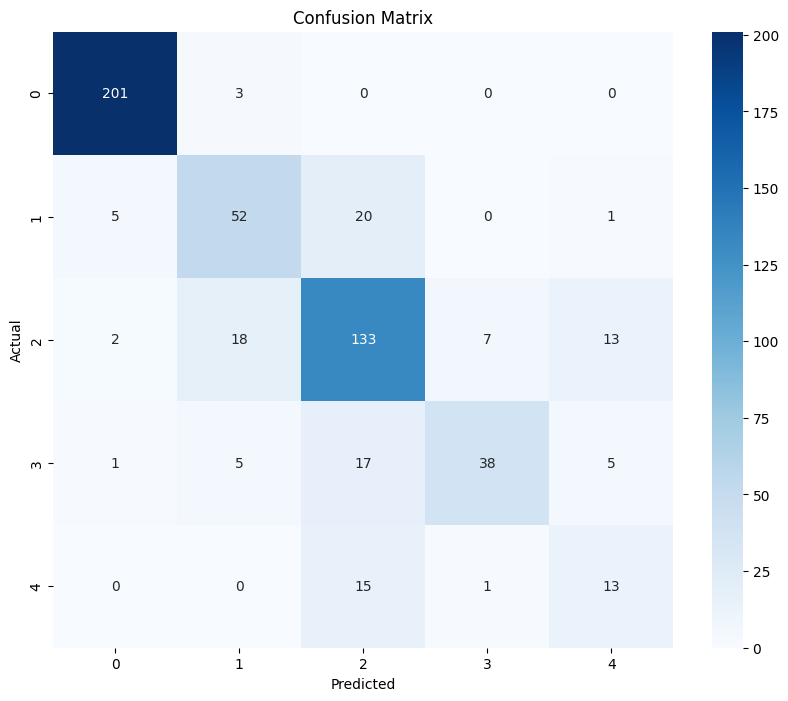

Classification Report:
                 precision    recall  f1-score   support

       Healthy       0.96      0.99      0.97       204
       Mild DR       0.67      0.67      0.67        78
   Moderate DR       0.72      0.77      0.74       173
Proliferate DR       0.83      0.58      0.68        66
     Severe DR       0.41      0.45      0.43        29

      accuracy                           0.79       550
     macro avg       0.72      0.69      0.70       550
  weighted avg       0.80      0.79      0.79       550



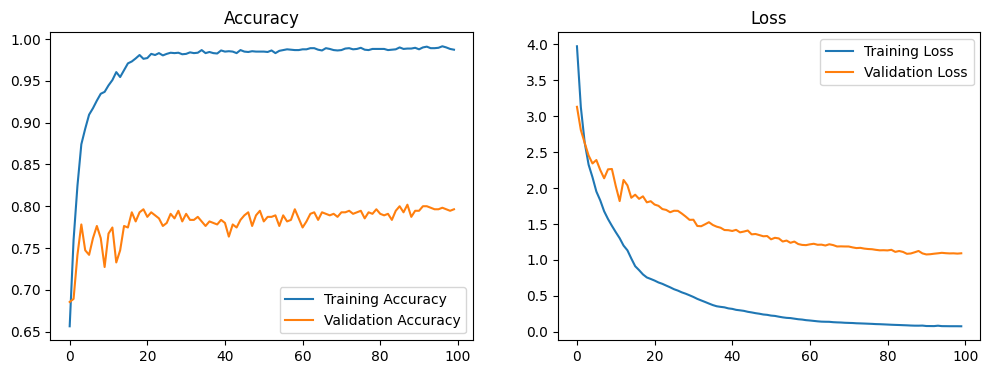

Model saved to /kaggle/working/diabetic_retinopathy_ensemble_model_improved.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
DR Level Percentages: {'Healthy': 0.00095429894, 'Mild DR': 0.0008950377, 'Moderate DR': 99.9957, 'Proliferate DR': 0.0010467328, 'Severe DR': 0.0014145467}


In [1]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB7, DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Average, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Set parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 100

# 1. Load the Dataset
dataset_path = '/kaggle/input/diabetic-retinopathy-dataset'
images = []
labels = []

for class_label in ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']:
    class_path = os.path.join(dataset_path, class_label)
    class_images = os.listdir(class_path)
    
    for img_name in tqdm(class_images, desc=f"Loading {class_label} images"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_label)
        else:
            print(f"Warning: Failed to read {img_path}")

images = np.array(images)
labels = np.array(labels)

# 2. Encode the Labels
label_map = {'Healthy': 0, 'Mild DR': 1, 'Moderate DR': 2, 'Proliferate DR': 3, 'Severe DR': 4}
labels = np.array([label_map[label] for label in labels])
labels = to_categorical(labels, num_classes=5)

# 3. Split Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# 4. Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

datagen.fit(X_train)

# 5. Load EfficientNetB7 and DenseNet201, and add custom layers
efficientnet_base = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
densenet_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))

# Unfreeze more layers for fine-tuning in EfficientNet
for layer in efficientnet_base.layers[-40:]:
    layer.trainable = True

# Unfreeze more layers for fine-tuning in DenseNet
for layer in densenet_base.layers[-40:]:
    layer.trainable = True

# EfficientNetB7 custom layers
efficientnet_x = GlobalAveragePooling2D()(efficientnet_base.output)
efficientnet_x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(efficientnet_x)
efficientnet_x = Dropout(0.5)(efficientnet_x)
efficientnet_output = Dense(5, activation='softmax')(efficientnet_x)

# DenseNet201 custom layers
densenet_x = GlobalAveragePooling2D()(densenet_base.output)
densenet_x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(densenet_x)
densenet_x = Dropout(0.5)(densenet_x)
densenet_output = Dense(5, activation='softmax')(densenet_x)

# Ensemble the models using weighted average
ensemble_output = Average()([efficientnet_output, densenet_output])

model = Model(inputs=[efficientnet_base.input, densenet_base.input], outputs=ensemble_output)

# 6. Compile the Model with Class Weights
class_weights = {0: 1, 1: 1.5, 2: 1.5, 3: 2, 4: 2}  # Adjust based on class distribution

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Set Callbacks for Learning Rate Adjustment and Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# 8. Train the Model
history = model.fit(
    [X_train, X_train], y_train,
    validation_data=([X_val, X_val], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, early_stopping],
    class_weight=class_weights
)

# 9. Evaluate the Model
loss, accuracy = model.evaluate([X_val, X_val], y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# 10. Generate and Plot Confusion Matrix
y_pred = model.predict([X_val, X_val])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 11. Generate Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=label_map.keys())
print("Classification Report:\n", class_report)

# 12. Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# 13. Save the Model
model_save_path = '/kaggle/working/diabetic_retinopathy_ensemble_model_improved.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

# 14. Predict and Show DR Levels in Percentage
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict([img, img])
    percentages = predictions[0] * 100
    dr_levels = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    return dict(zip(dr_levels, percentages))

# Example usage:
image_path = '/kaggle/input/diabetic-retinopathy-dataset/Moderate DR/Moderate_DR_10.png'  
result = predict_image(image_path)
print("DR Level Percentages:", result)


In [10]:
pip install tensorflow-addons


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
ydata-profiling 4.9.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Loading Severe DR images: 100%|██████████| 190/190 [00:02<00:00, 86.42it/s]


350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/100


I0000 00:00:1725021183.790609     102 service.cc:145] XLA service 0x78bfec058410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725021183.790660     102 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1725021400.558033     102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1725021400.797991     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


137/138 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.5781 - loss: 4.7904

I0000 00:00:1725021664.337060     101 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_109', 224 bytes spill stores, 224 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_103', 224 bytes spill stores, 224 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 224 bytes spill stores, 224 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_95', 172 bytes spill stores, 172 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_859', 12 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_36', 32 bytes spill stores, 20 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_25',

138/138 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.5793 - loss: 4.7867 - val_accuracy: 0.7200 - val_loss: 3.8031 - learning_rate: 3.0000e-05
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 73s 530ms/step - accuracy: 0.7426 - loss: 4.0976 - val_accuracy: 0.7527 - val_loss: 3.5663 - learning_rate: 3.0000e-05
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 73s 533ms/step - accuracy: 0.8333 - loss: 3.6961 - val_accuracy: 0.7691 - val_loss: 3.4713 - learning_rate: 3.0000e-05
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 73s 531ms/step - accuracy: 0.8946 - loss: 3.3636 - val_accuracy: 0.7891 - val_loss: 3.4585 - learning_rate: 3.0000e-05
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 66s 475ms/step - accuracy: 0.9541 - loss: 3.0401 - val_accuracy: 0.7818 - val_loss: 3.4649 - learning_rate: 3.0000e-05
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 65s 474ms/step - accuracy: 0.9634 - loss: 2.8915 - val_accuracy: 0.7782 - val_loss: 3.4641 - learning_rate: 3.0000e-05
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 72s 520ms/ste

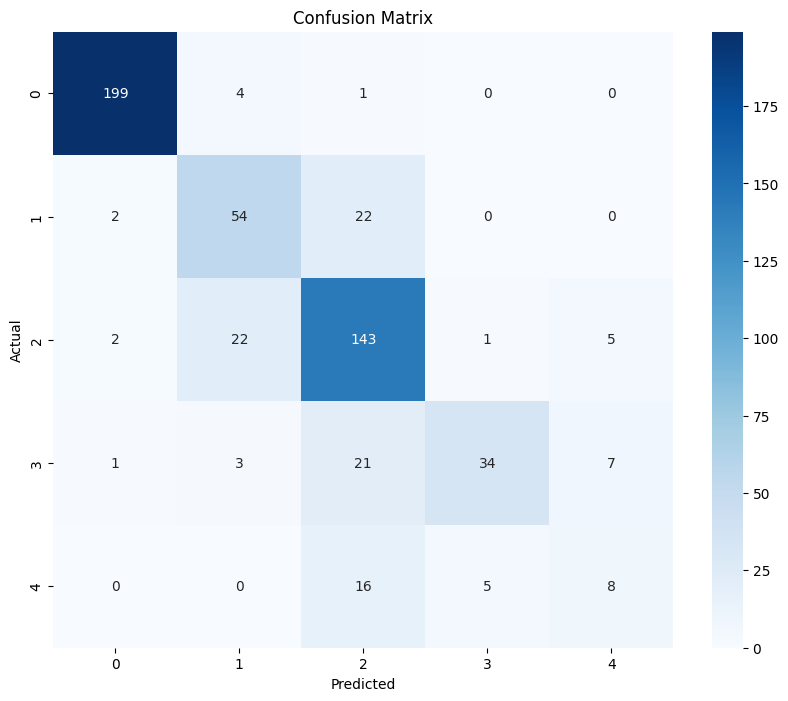

Classification Report:
                 precision    recall  f1-score   support

       Healthy       0.98      0.98      0.98       204
       Mild DR       0.65      0.69      0.67        78
   Moderate DR       0.70      0.83      0.76       173
Proliferate DR       0.85      0.52      0.64        66
     Severe DR       0.40      0.28      0.33        29

      accuracy                           0.80       550
     macro avg       0.72      0.66      0.67       550
  weighted avg       0.80      0.80      0.79       550



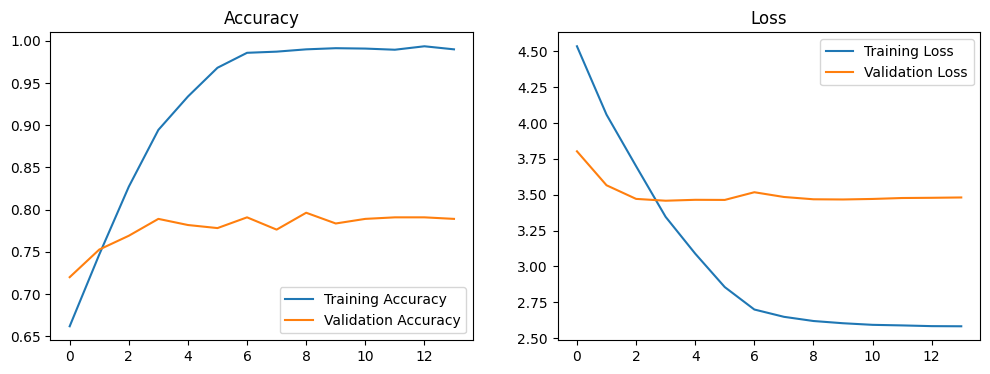

Model saved to /kaggle/working/diabetic_retinopathy_advanced_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
DR Level Percentages: {'Healthy': 0.00023524162, 'Mild DR': 0.012221506, 'Moderate DR': 99.963974, 'Proliferate DR': 0.020103062, 'Severe DR': 0.0034670392}


In [1]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B3, ConvNeXtBase
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, concatenate, Add, Multiply, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Set parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 100

# Load the Dataset
dataset_path = '/kaggle/input/diabetic-retinopathy-dataset'
images = []
labels = []

for class_label in ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']:
    class_path = os.path.join(dataset_path, class_label)
    class_images = os.listdir(class_path)
    
    for img_name in tqdm(class_images, desc=f"Loading {class_label} images"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_label)
        else:
            print(f"Warning: Failed to read {img_path}")

images = np.array(images)
labels = np.array(labels)

# Encode the Labels
label_map = {'Healthy': 0, 'Mild DR': 1, 'Moderate DR': 2, 'Proliferate DR': 3, 'Severe DR': 4}
labels = np.array([label_map[label] for label in labels])
labels = to_categorical(labels, num_classes=5)

# Split Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest',
    channel_shift_range=0.1
)

datagen.fit(X_train)

# Load Modern Architectures with Custom Layers
def create_model(input_shape):
    # EfficientNetV2B3 Base
    efficientnet_base = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=input_shape)
    efficientnet_x = GlobalAveragePooling2D()(efficientnet_base.output)
    efficientnet_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(efficientnet_x)
    efficientnet_x = Dropout(0.5)(efficientnet_x)
    efficientnet_output = Dense(5, activation='softmax')(efficientnet_x)

    # ConvNeXtBase Base
    convnext_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)
    convnext_x = GlobalAveragePooling2D()(convnext_base.output)
    convnext_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(convnext_x)
    convnext_x = Dropout(0.5)(convnext_x)
    convnext_output = Dense(5, activation='softmax')(convnext_x)

    # Attention Mechanism
    def attention_block(inputs):
        attention_probs = Dense(2048, activation='sigmoid')(inputs)
        attention_mul = Multiply()([inputs, attention_probs])
        return attention_mul

    # Apply Attention
    attention_efficientnet = attention_block(efficientnet_x)
    attention_convnext = attention_block(convnext_x)

    # Concatenate the models with attention
    combined = concatenate([attention_efficientnet, attention_convnext])

    # Final Dense Layer
    final_output = Dense(5, activation='softmax')(combined)

    model = Model(inputs=[efficientnet_base.input, convnext_base.input], outputs=final_output)

    return model

# Build the model
model = create_model((*IMAGE_SIZE, 3))

# Compile the Model with Class Weights
class_weights = {0: 1, 1: 1.5, 2: 1.5, 3: 2, 4: 2}  # Adjust based on class distribution

model.compile(optimizer=Adam(learning_rate=3e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Learning Rate Adjustment and Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-8)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the Model
history = model.fit(
    [X_train, X_train], y_train,
    validation_data=([X_val, X_val], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, early_stopping, checkpoint],
    class_weight=class_weights
)

# Evaluate the Model
model.load_weights('best_model.keras')  # Load the best model
loss, accuracy = model.evaluate([X_val, X_val], y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# Generate and Plot Confusion Matrix
y_pred = model.predict([X_val, X_val])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=label_map.keys())
print("Classification Report:\n", class_report)

# Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Save the Model
model_save_path = '/kaggle/working/diabetic_retinopathy_advanced_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

# Predict and Show DR Levels in Percentage
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict([img, img])
    percentages = predictions[0] * 100
    dr_levels = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    return dict(zip(dr_levels, percentages))

# Example usage:
image_path = '/kaggle/input/diabetic-retinopathy-dataset/Moderate DR/Moderate_DR_10.png'  
result = predict_image(image_path)
print("DR Level Percentages:", result)


In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B3, ConvNeXtBase
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, concatenate, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Set parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 100

# Load the Dataset
dataset_path = '/kaggle/input/diabetic-retinopathy-dataset'
images = []
labels = []

for class_label in ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']:
    class_path = os.path.join(dataset_path, class_label)
    class_images = os.listdir(class_path)
    
    for img_name in tqdm(class_images, desc=f"Loading {class_label} images"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_label)
        else:
            print(f"Warning: Failed to read {img_path}")

images = np.array(images)
labels = np.array(labels)

# Encode the Labels
label_map = {'Healthy': 0, 'Mild DR': 1, 'Moderate DR': 2, 'Proliferate DR': 3, 'Severe DR': 4}
labels = np.array([label_map[label] for label in labels])

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
images, labels = sm.fit_resample(images.reshape(-1, IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3), labels)
images = images.reshape(-1, *IMAGE_SIZE, 3)
labels = to_categorical(labels, num_classes=5)

# Split Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest',
    channel_shift_range=0.1
)

datagen.fit(X_train)

# Load Modern Architectures with Custom Layers
def create_model(input_shape):
    # EfficientNetV2B3 Base
    efficientnet_base = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=input_shape)
    efficientnet_x = GlobalAveragePooling2D()(efficientnet_base.output)
    efficientnet_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(efficientnet_x)
    efficientnet_x = Dropout(0.5)(efficientnet_x)
    efficientnet_output = Dense(5, activation='softmax')(efficientnet_x)

    # ConvNeXtBase Base
    convnext_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)
    convnext_x = GlobalAveragePooling2D()(convnext_base.output)
    convnext_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(convnext_x)
    convnext_x = Dropout(0.5)(convnext_x)
    convnext_output = Dense(5, activation='softmax')(convnext_x)

    # Attention Mechanism
    def attention_block(inputs):
        attention_probs = Dense(2048, activation='sigmoid')(inputs)
        attention_mul = Multiply()([inputs, attention_probs])
        return attention_mul

    # Apply Attention
    attention_efficientnet = attention_block(efficientnet_x)
    attention_convnext = attention_block(convnext_x)

    # Concatenate the models with attention
    combined = concatenate([attention_efficientnet, attention_convnext])

    # Final Dense Layer
    final_output = Dense(5, activation='softmax')(combined)

    model = Model(inputs=[efficientnet_base.input, convnext_base.input], outputs=final_output)

    return model

# Build the model
model = create_model((*IMAGE_SIZE, 3))

# Compile the Model with Class Weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 3, 4: 4}  # Adjusted weights

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Learning Rate Adjustment and Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-8)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the Model
history = model.fit(
    [X_train, X_train], y_train,
    validation_data=([X_val, X_val], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, early_stopping, checkpoint],
    class_weight=class_weights
)

# Evaluate the Model
model.load_weights('best_model.keras')  # Load the best model
loss, accuracy = model.evaluate([X_val, X_val], y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# Generate and Plot Confusion Matrix
y_pred = model.predict([X_val, X_val])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=label_map.keys())
print("Classification Report:\n", class_report)

# Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Save the Model
model_save_path = '/kaggle/working/diabetic_retinopathy_advanced_model_v2.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

# Predict and Show DR Levels in Percentage
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict([img, img])
    percentages = predictions[0] * 100
    dr_levels = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    return dict(zip(dr_levels, percentages))

# Example usage:
image_path = '/kaggle/input/diabetic-retinopathy-dataset/Moderate DR/Moderate_DR_10.png'  
result = predict_image(image_path)
print("DR Level Percentages:", result)


Loading Severe DR images: 100%|██████████| 190/190 [00:02<00:00, 87.34it/s]


52606240/52606240 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/100


I0000 00:00:1725069845.518245     100 service.cc:145] XLA service 0x7fd090001980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725069845.518305     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1725070043.013235     100 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_98', 224 bytes spill stores, 224 bytes spill loads

I0000 00:00:1725070043.244466     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 452s 585ms/step - accuracy: 0.3718 - loss: 6.4235 - val_accuracy: 0.6830 - val_loss: 3.9352 - learning_rate: 1.0000e-05
Epoch 2/100
212/250 ━━━━━━━━━━━━━━━━━━━━ 16s 439ms/step - accuracy: 0.6704 - loss: 5.2365

In [1]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file in the Kaggle output directory
df.to_csv('/kaggle/working/test_output_file.csv', index=False)

print("File saved successfully!")


File saved successfully!


Loading Severe DR images: 100%|██████████| 190/190 [00:00<00:00, 237.72it/s]


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 406s 563ms/step - accuracy: 0.3842 - loss: 6.3649 - val_accuracy: 0.6950 - val_loss: 3.9183 - learning_rate: 1.0000e-05
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 124s 496ms/step - accuracy: 0.7064 - loss: 5.0949 - val_accuracy: 0.7530 - val_loss: 3.7166 - learning_rate: 1.0000e-05
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 124s 496ms/step - accuracy: 0.7989 - loss: 4.4562 - val_accuracy: 0.7730 - val_loss: 3.6568 - learning_rate: 1.0000e-05
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 124s 496ms/step - accuracy: 0.8690 - loss: 3.9987 - val_accuracy: 0.8060 - val_loss: 3.5650 - learning_rate: 1.0000e-05
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 117s 469ms/step - accuracy: 0.9105 - loss: 3.6345 - val_accuracy: 0.7850 - val_loss: 3.6813 - learning_rate: 1.0000e-05
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 117s 469ms/step - accuracy: 0.9357 - loss: 3.3684 - val_accuracy: 0.7980 - val_loss: 3.6017 - learning_rate: 1.0000e-05
Epoch 7/100
250/250 ━━━━━━━━━━━━━━

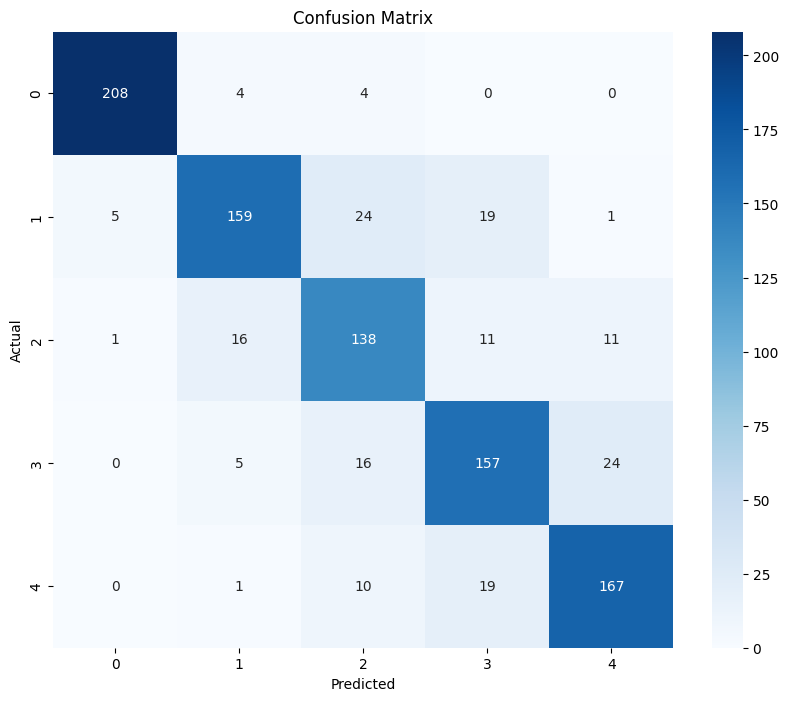

Classification Report:
                 precision    recall  f1-score   support

       Healthy       0.97      0.96      0.97       216
       Mild DR       0.86      0.76      0.81       208
   Moderate DR       0.72      0.78      0.75       177
Proliferate DR       0.76      0.78      0.77       202
     Severe DR       0.82      0.85      0.84       197

      accuracy                           0.83      1000
     macro avg       0.83      0.83      0.83      1000
  weighted avg       0.83      0.83      0.83      1000



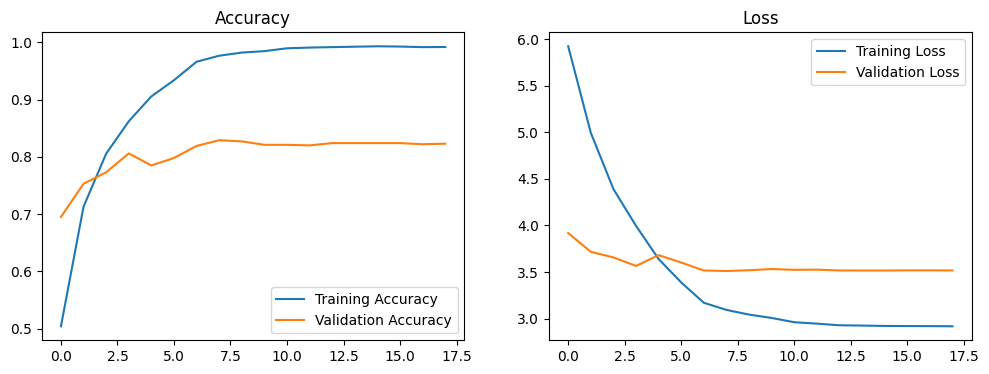

Model saved to /kaggle/working/diabeticModel.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
DR Level Percentages: {'Healthy': 97.0, 'Mild DR': 2.8262112, 'Moderate DR': 0.1020292, 'Proliferate DR': 0.027923224, 'Severe DR': 0.043820336}


In [3]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B3, ConvNeXtBase
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, concatenate, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Set parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 100

# Load the Dataset
dataset_path = r'/kaggle/input/diabetic-retinopathy-dataset'  # Corrected path format
images = []
labels = []

for class_label in ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']:
    class_path = os.path.join(dataset_path, class_label)
    class_images = os.listdir(class_path)
    
    for img_name in tqdm(class_images, desc=f"Loading {class_label} images"):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, IMAGE_SIZE)
            images.append(img)
            labels.append(class_label)
        else:
            print(f"Warning: Failed to read {img_path}")

images = np.array(images)
labels = np.array(labels)

# Encode the Labels
label_map = {'Healthy': 0, 'Mild DR': 1, 'Moderate DR': 2, 'Proliferate DR': 3, 'Severe DR': 4}
labels = np.array([label_map[label] for label in labels])

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
images, labels = sm.fit_resample(images.reshape(-1, IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3), labels)
images = images.reshape(-1, *IMAGE_SIZE, 3)
labels = to_categorical(labels, num_classes=5)

# Split Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest',
    channel_shift_range=0.1
)

datagen.fit(X_train)

# Load Modern Architectures with Custom Layers
def create_model(input_shape):
    # EfficientNetV2B3 Base
    efficientnet_base = EfficientNetV2B3(weights='imagenet', include_top=False, input_shape=input_shape)
    efficientnet_x = GlobalAveragePooling2D()(efficientnet_base.output)
    efficientnet_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(efficientnet_x)
    efficientnet_x = Dropout(0.5)(efficientnet_x)
    efficientnet_output = Dense(5, activation='softmax')(efficientnet_x)

    # ConvNeXtBase Base
    convnext_base = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=input_shape)
    convnext_x = GlobalAveragePooling2D()(convnext_base.output)
    convnext_x = Dense(2048, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(convnext_x)
    convnext_x = Dropout(0.5)(convnext_x)
    convnext_output = Dense(5, activation='softmax')(convnext_x)

    # Attention Mechanism
    def attention_block(inputs):
        attention_probs = Dense(2048, activation='sigmoid')(inputs)
        attention_mul = Multiply()([inputs, attention_probs])
        return attention_mul

    # Apply Attention
    attention_efficientnet = attention_block(efficientnet_x)
    attention_convnext = attention_block(convnext_x)

    # Concatenate the models with attention
    combined = concatenate([attention_efficientnet, attention_convnext])

    # Final Dense Layer
    final_output = Dense(5, activation='softmax')(combined)

    model = Model(inputs=[efficientnet_base.input, convnext_base.input], outputs=final_output)

    return model

# Build the model
model = create_model((*IMAGE_SIZE, 3))

# Compile the Model with Class Weights
class_weights = {0: 1, 1: 2, 2: 2, 3: 3, 4: 4}  # Adjusted weights

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Learning Rate Adjustment and Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-8)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train the Model
history = model.fit(
    [X_train, X_train], y_train,
    validation_data=([X_val, X_val], y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler, early_stopping, checkpoint],
    class_weight=class_weights
)

# Evaluate the Model
model.load_weights('best_model.keras')  # Load the best model
loss, accuracy = model.evaluate([X_val, X_val], y_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# Generate and Plot Confusion Matrix
y_pred = model.predict([X_val, X_val])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=label_map.keys())
print("Classification Report:\n", class_report)

# Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Save the Model
model_save_path = r'/kaggle/working/diabeticModel.h5'  # Corrected path format
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

# Predict and Show DR Levels in Percentage
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict([img, img])
    percentages = predictions[0] * 100
    dr_levels = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
    return dict(zip(dr_levels, percentages))

# Example usage:
image_path = r'/kaggle/input/diabetic-retinopathy-dataset/Healthy/Healthy_1000.png'  # Corrected path format
result = predict_image(image_path)
print("DR Level Percentages:", result)
